In [1]:
# import packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pickle
import numpy as np
import pandas as pd
import matplotlib
import missingno as msno

In [2]:
# list out lab test features for imputation
labs=['BaseExcess','HCO3','FiO2','pH','PaCO2','SaO2','AST','BUN','Alkalinephos','Calcium','Chloride','Creatinine','Bilirubin_direct','Glucose','Lactate',
      'Magnesium','Phosphate','Potassium','Bilirubin_total','TroponinI','Hct','Hgb','PTT','WBC','Fibrinogen','Platelets']

# list out vital signal features for imputation
vitals = ['HR','O2Sat','Temp','SBP','MAP','DBP','Resp','EtCO2']

# list out demographic features for imputation
demogs = ['Age','Gender','Unit1','Unit2','HospAdmTime','ICULOS']

# labels
labels = ['SepsisLabel']

In [3]:
with open('raw_data.pickle', 'rb') as f:
    data = pickle.load(f)

In [4]:
sepsis_ratio = data.groupby('SepsisLabel').count()['patient_id']
print(sepsis_ratio)
sepsis_ratio = sepsis_ratio[1] / sepsis_ratio.sum()
print(sepsis_ratio)

SepsisLabel
0    773079
1     17136
Name: patient_id, dtype: int64
0.02168523756192935


In [5]:
labs_df = data[labs]
vitals_df = data[vitals]
demogs_df = data[demogs]

In [6]:
np.mean((labs_df.isnull().sum() / labs_df.shape[0]))

0.9346068913085486

In [7]:
np.mean((vitals_df.isnull().sum() / vitals_df.shape[0]))

0.3366822636877305

In [8]:
np.mean((demogs_df.isnull().sum() / demogs_df.shape[0]))

0.1628961738261106

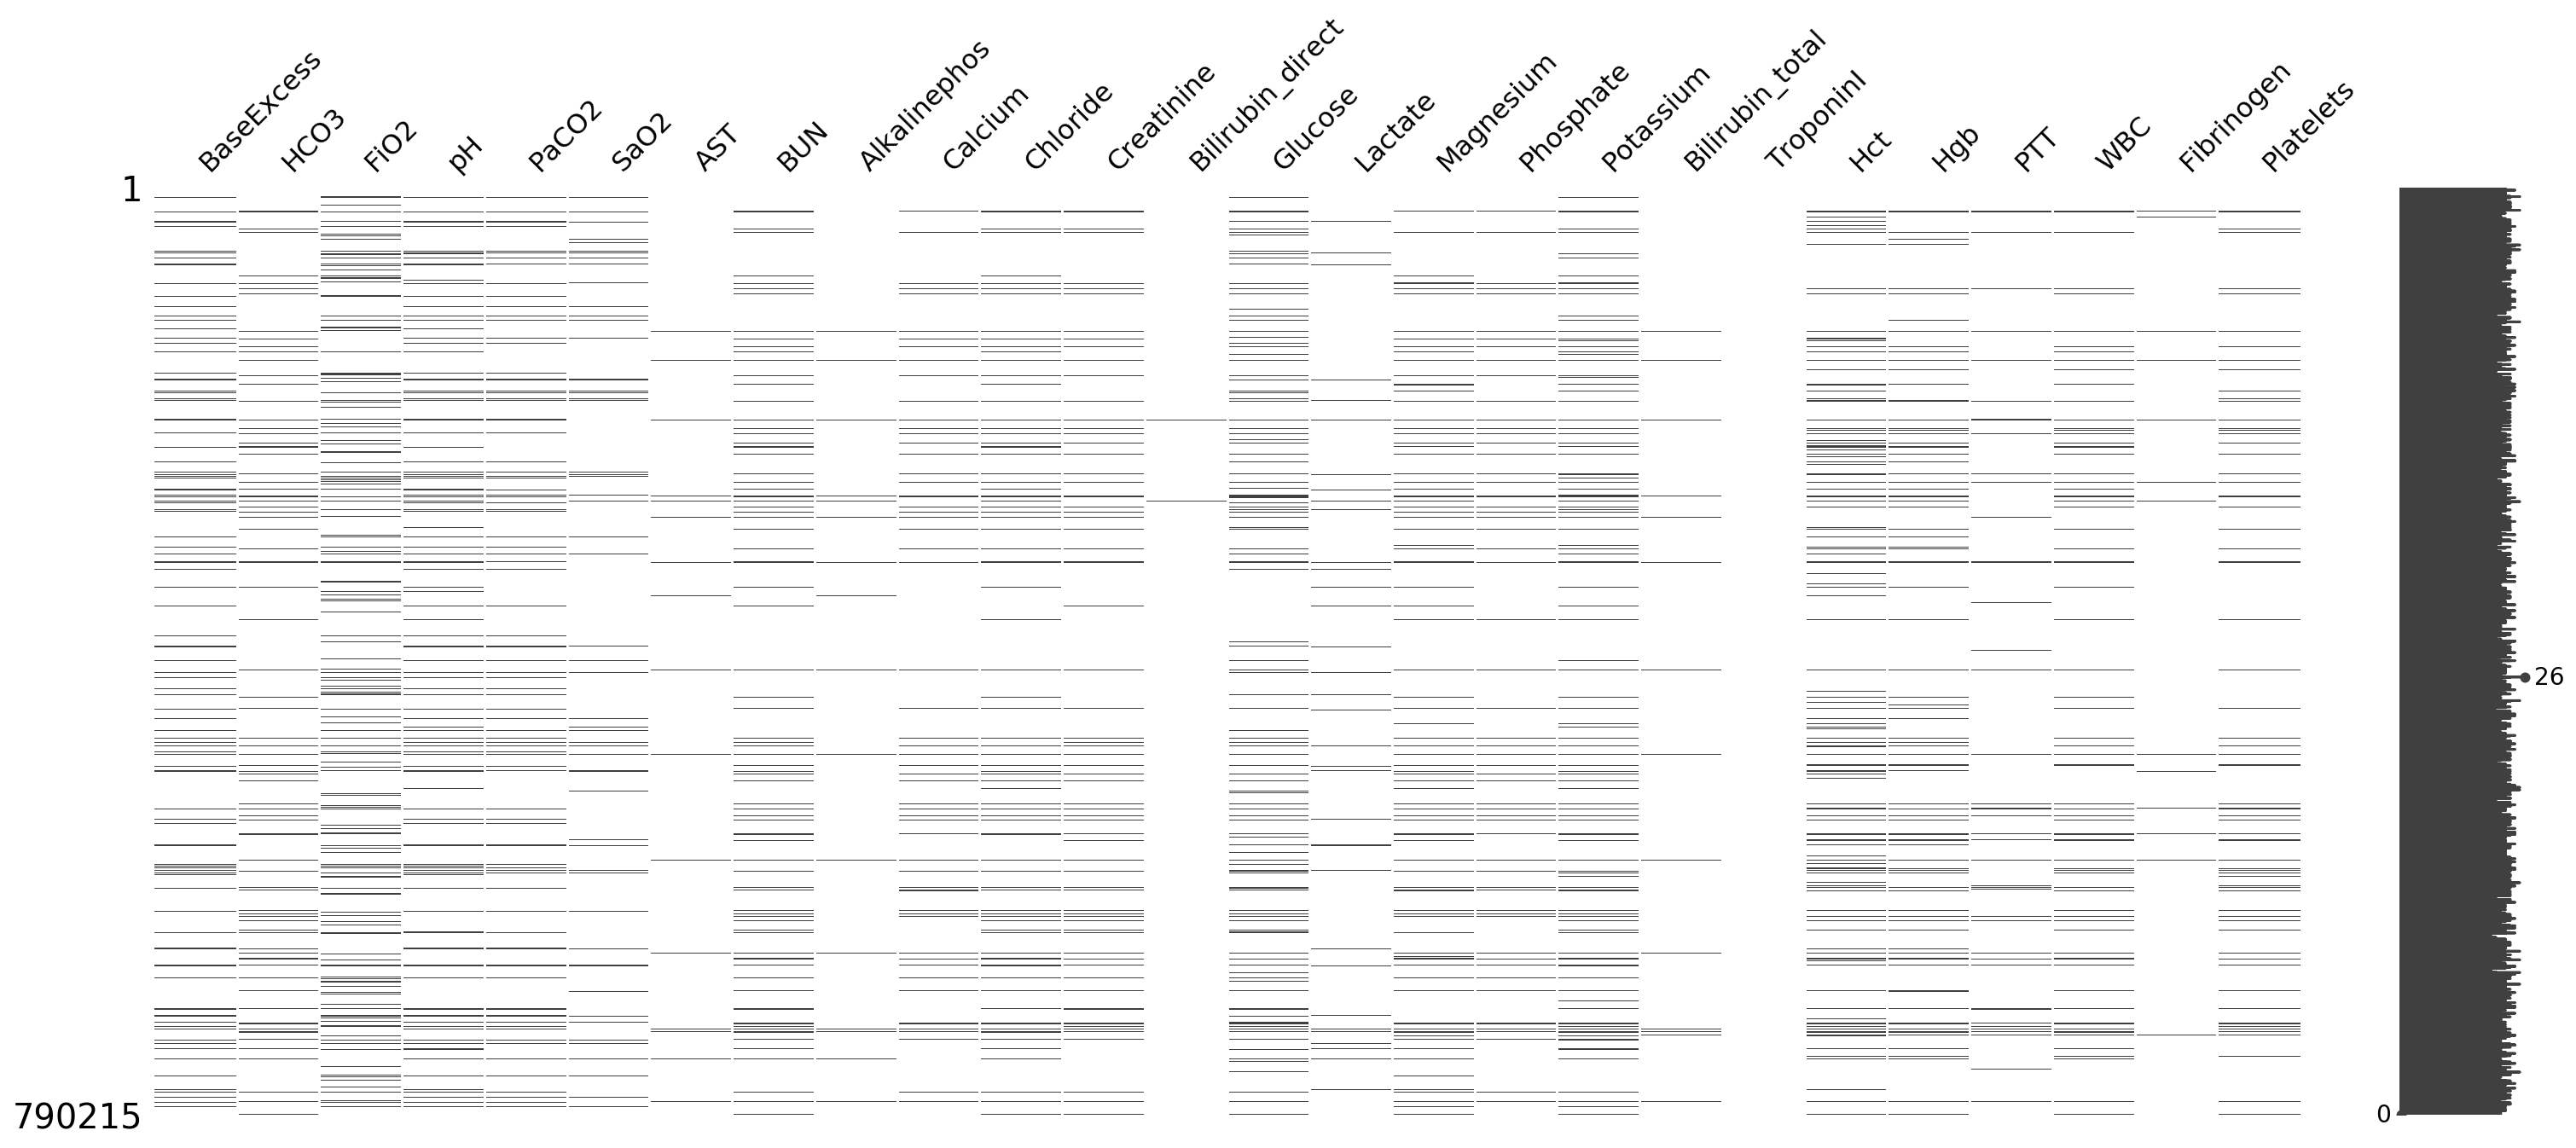

In [9]:
msno.matrix(labs_df)

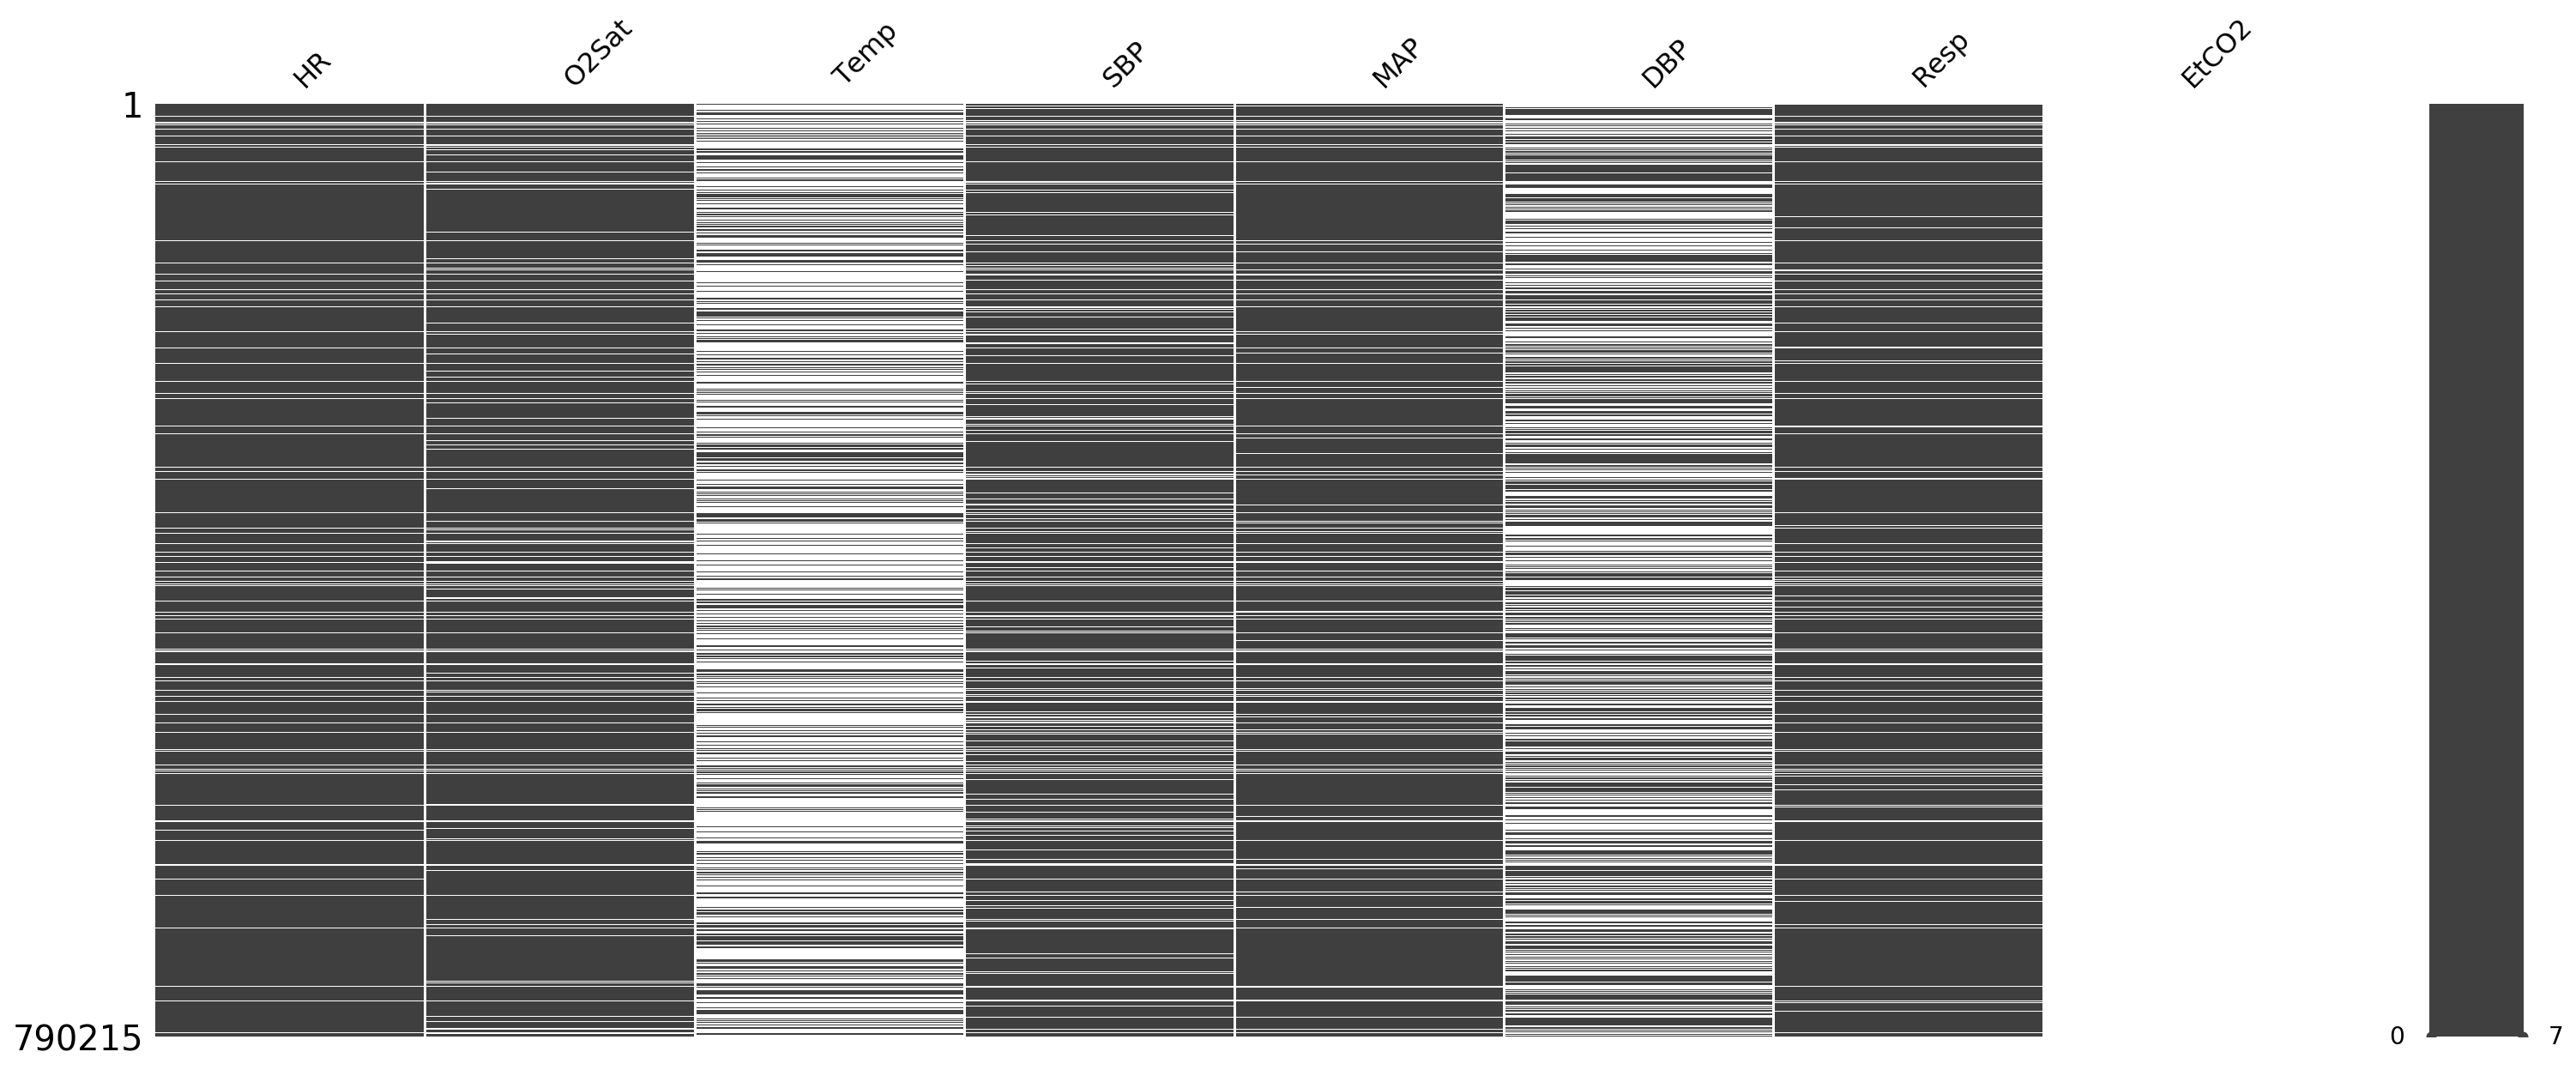

In [10]:
msno.matrix(vitals_df)

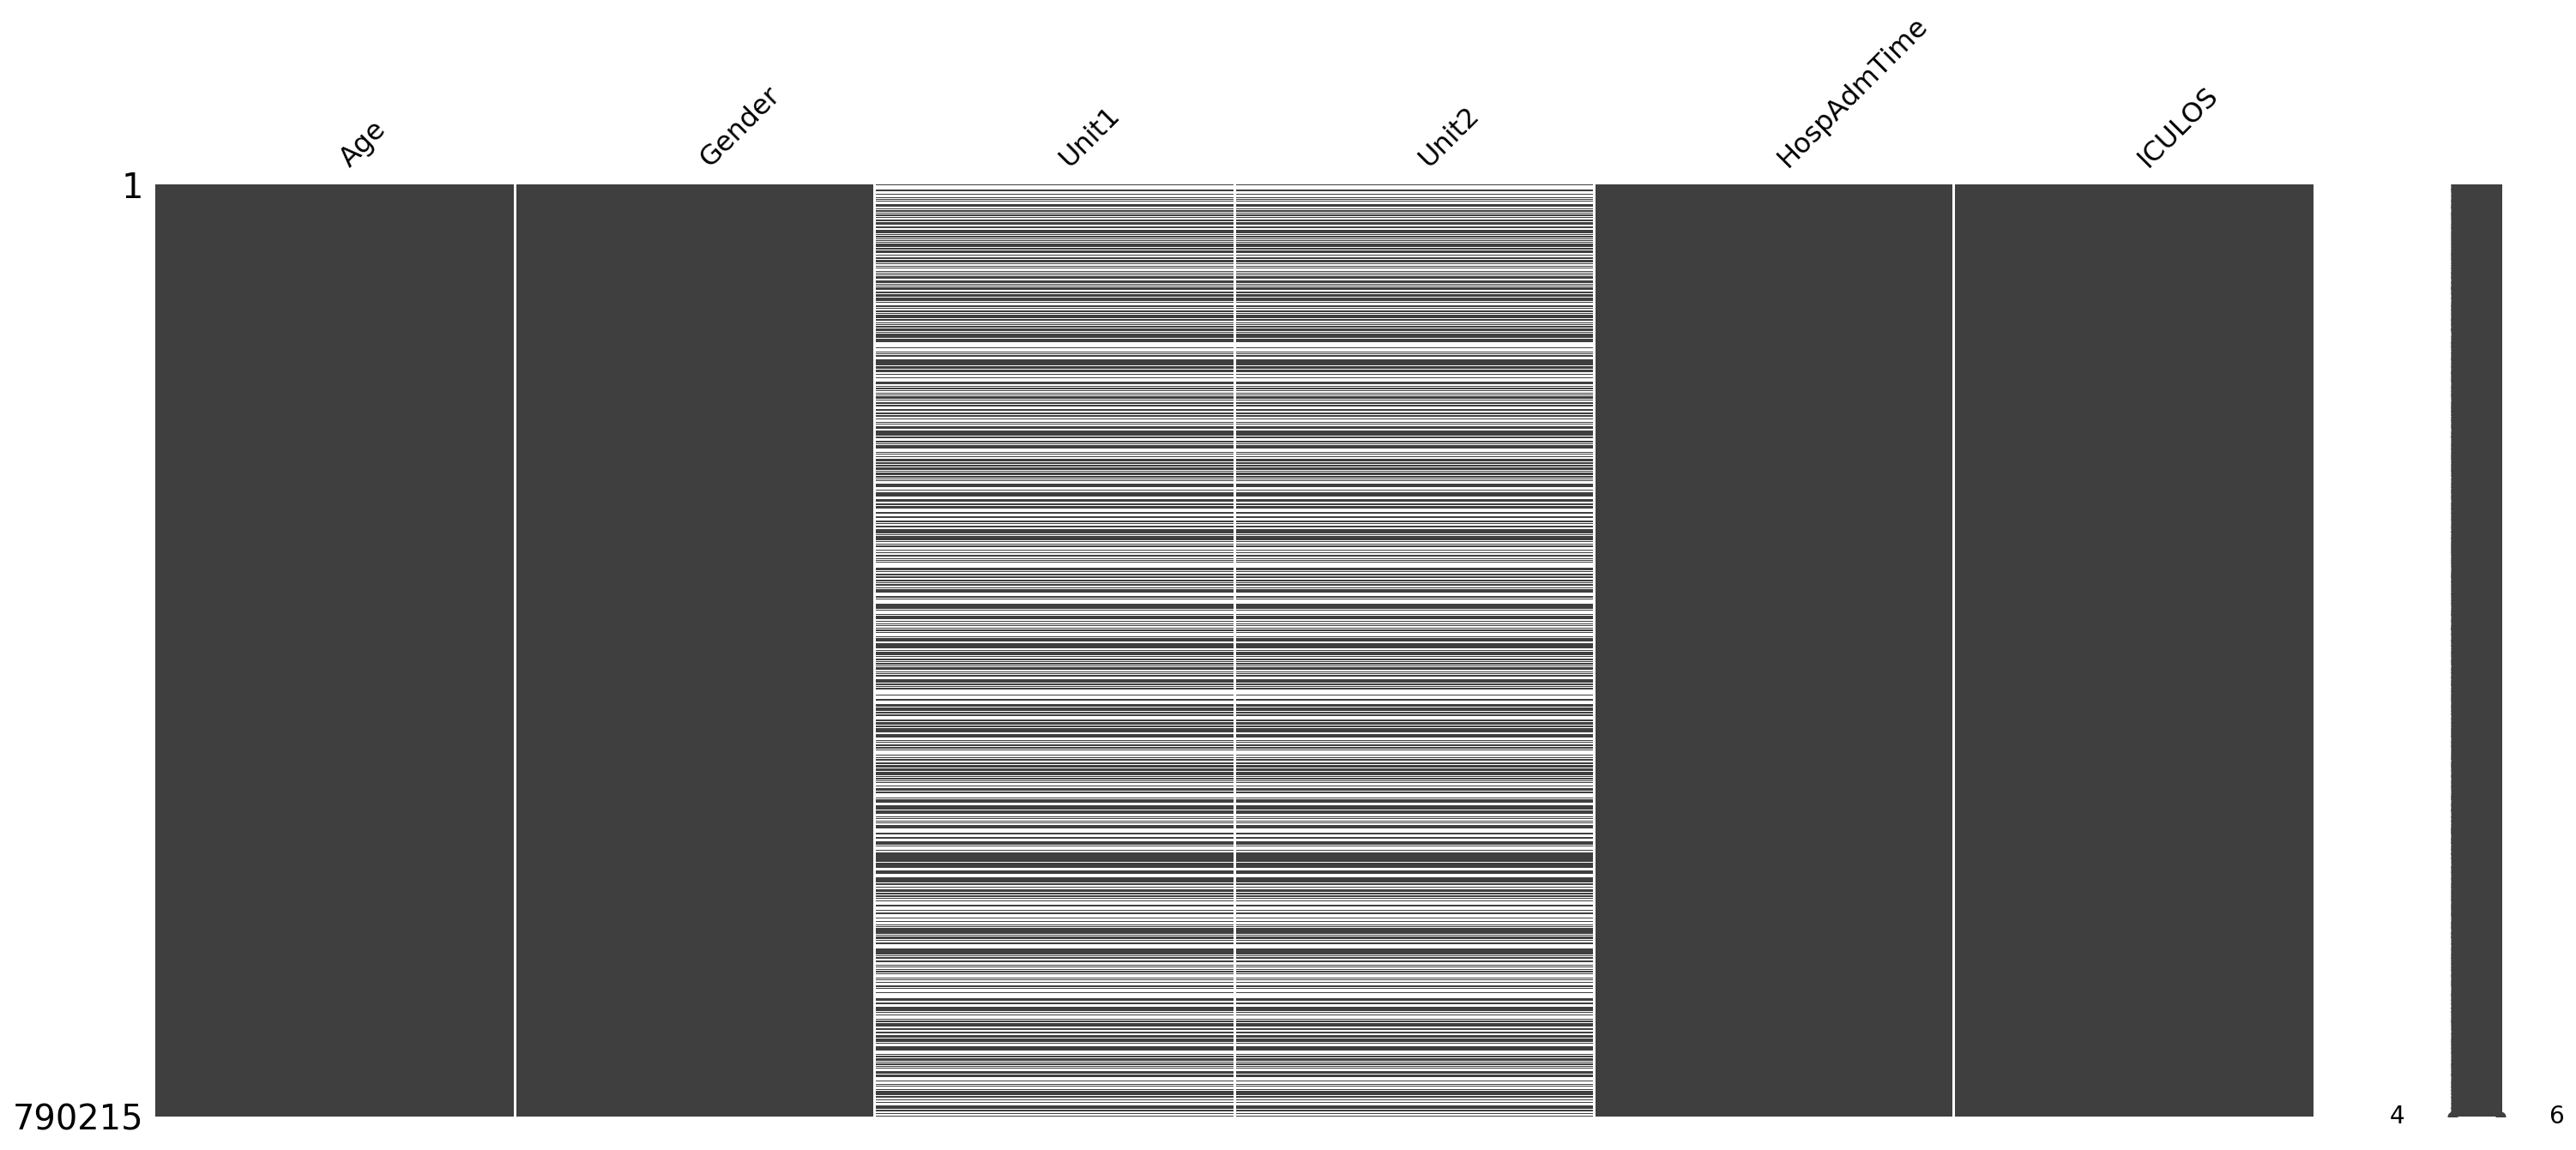

In [11]:
msno.matrix(demogs_df)

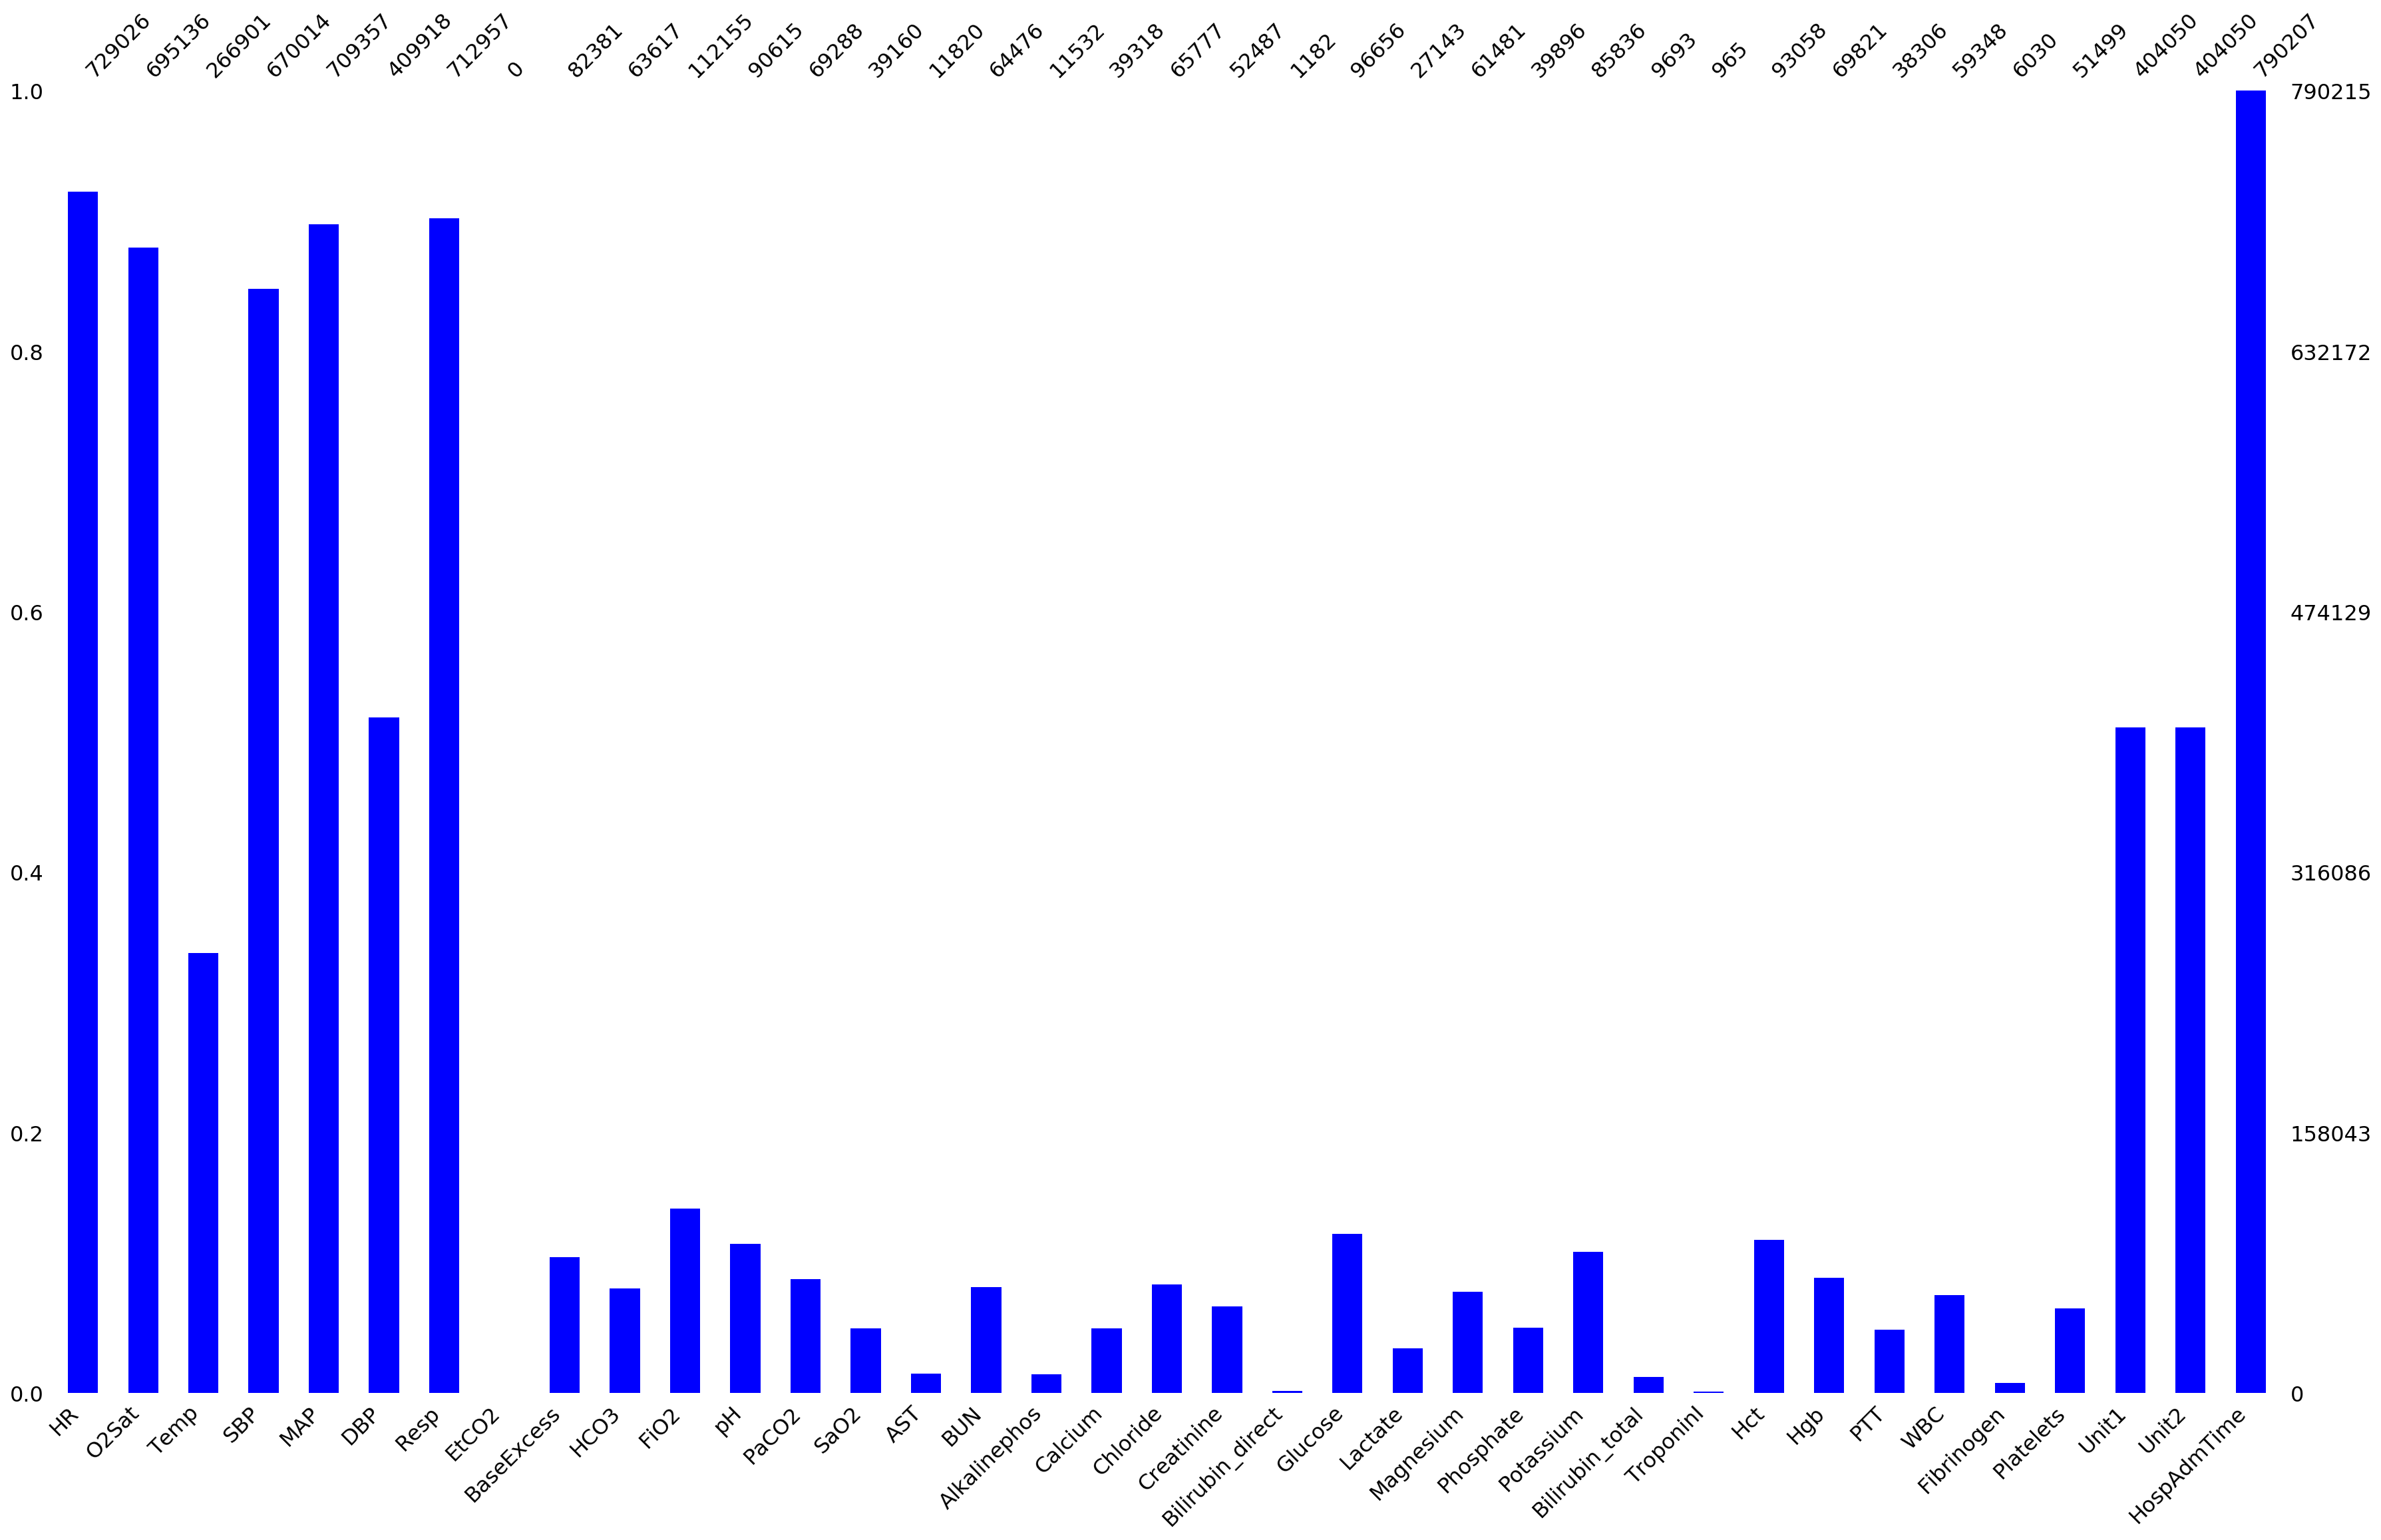

In [12]:
missingdata_df = data.columns[data.isnull().any()].tolist()
msno.bar(data[missingdata_df], color="blue", log=False, figsize=(30,18))

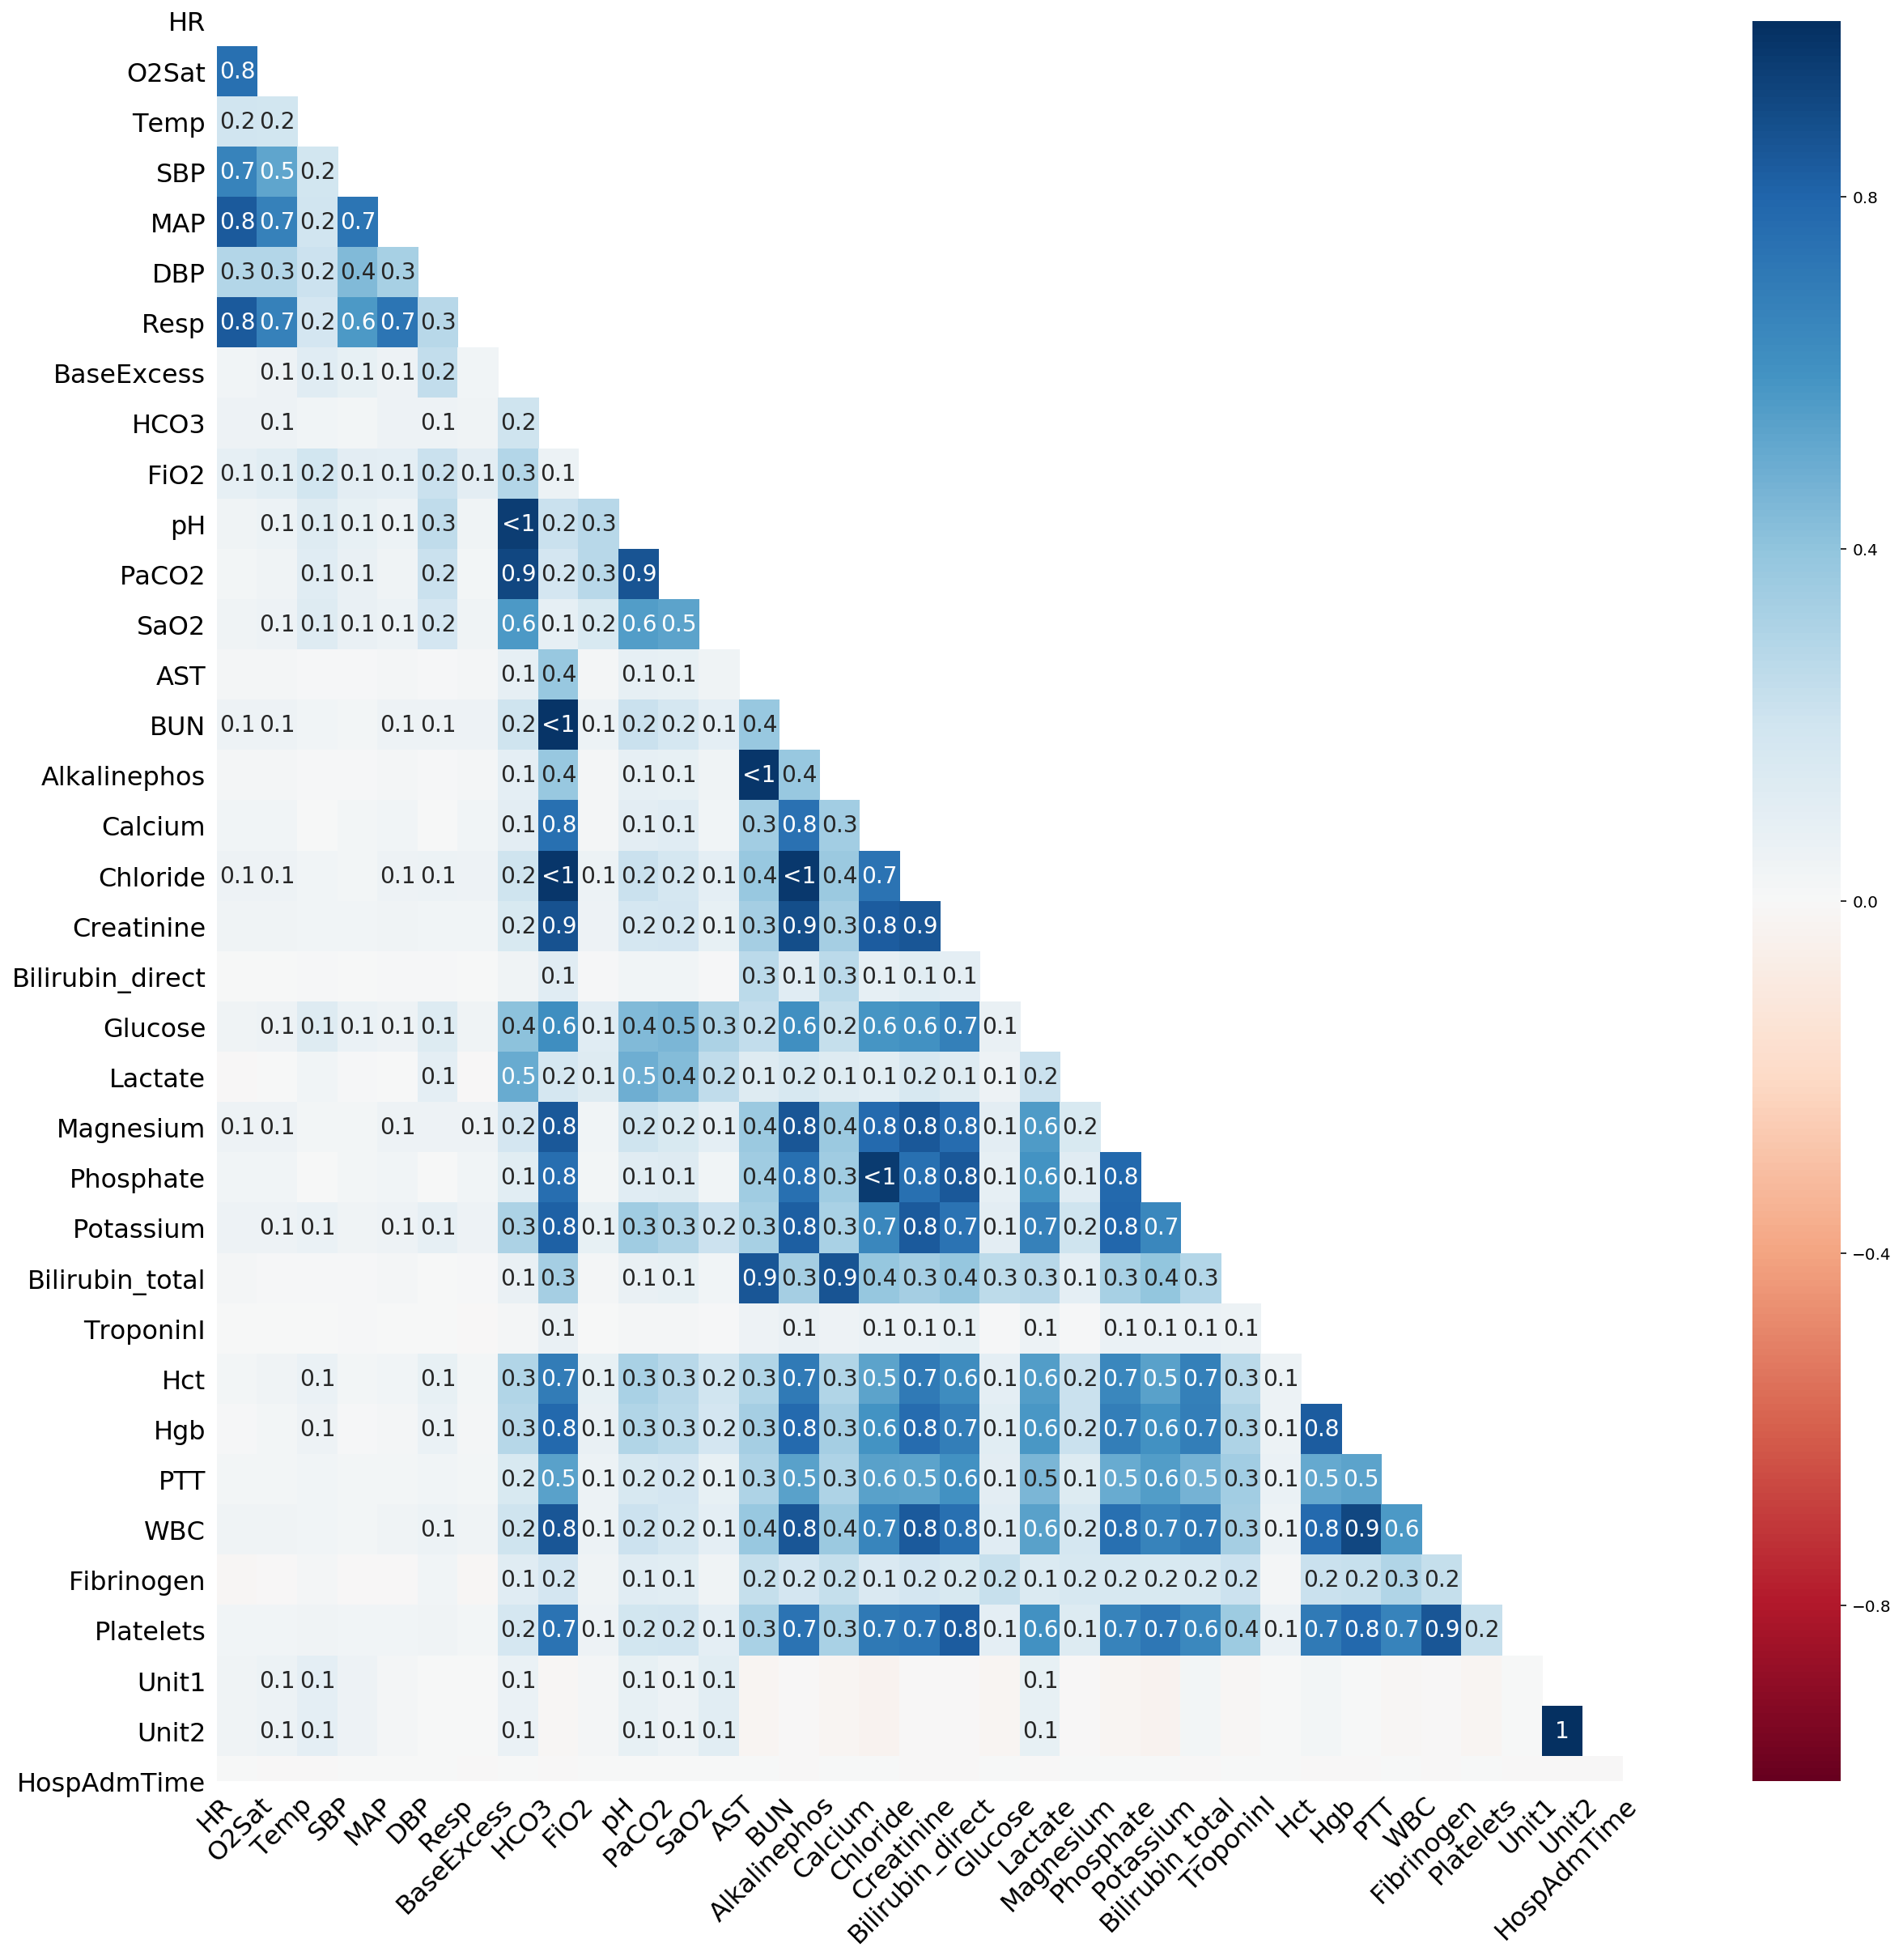

In [13]:
msno.heatmap(data[missingdata_df], figsize=(20,20))